In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

## Data Loading

In [62]:
df = pd.read_csv('UK_foods.csv',index_col='Unnamed: 0')

In [63]:
df.head()

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Cheese to Confectionery 
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   England    17 non-null     int64
 1   Wales      17 non-null     int64
 2   Scotland   17 non-null     int64
 3   N.Ireland  17 non-null     int64
dtypes: int64(4)
memory usage: 680.0+ bytes


In [65]:
df = df.transpose()
df

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


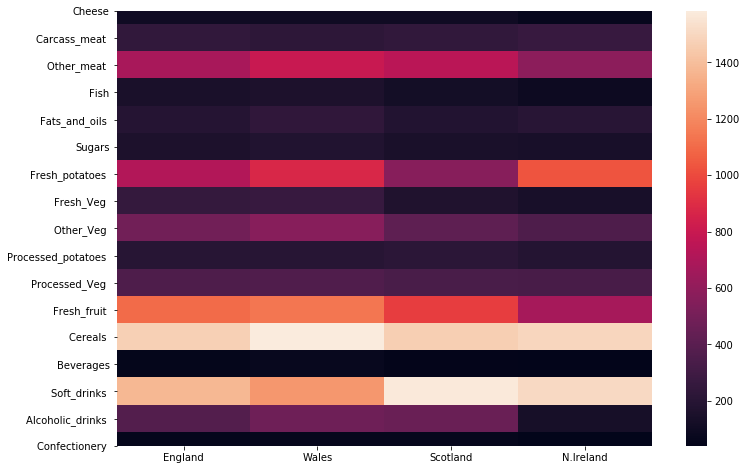

In [66]:
plt.figure(figsize=(12,8))
sns.heatmap(df.transpose())

## Model

In [67]:
encoder = Sequential()

encoder.add(Dense(8,activation='relu',input_shape=[17]))
encoder.add(Dense(4,activation='relu'))
encoder.add(Dense(2,activation='relu'))

In [68]:
decoder = Sequential()

decoder.add(Dense(4,activation='relu',input_shape=[2]))
decoder.add(Dense(8,activation='relu'))
decoder.add(Dense(17,activation='relu'))

In [69]:
autoencoder = Sequential([encoder,decoder])

autoencoder.compile(loss='mse',optimizer=SGD(lr=1.5))

In [70]:
X = df.values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
X_scaled

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

In [73]:
autoencoder.fit(X_scaled,X_scaled,epochs=15)

Train on 4 samples
Epoch 1/15
4/4 [==============================] - 0s 124ms/sample - loss: 0.4237
Epoch 2/15
4/4 [==============================] - 0s 1000us/sample - loss: 0.3447
Epoch 3/15
4/4 [==============================] - 0s 749us/sample - loss: 0.2956
Epoch 4/15
4/4 [==============================] - 0s 749us/sample - loss: 0.2809
Epoch 5/15
4/4 [==============================] - 0s 750us/sample - loss: 0.2688
Epoch 6/15
4/4 [==============================] - 0s 1ms/sample - loss: 0.2638
Epoch 7/15
4/4 [==============================] - 0s 1ms/sample - loss: 0.2610
Epoch 8/15
4/4 [==============================] - 0s 1000us/sample - loss: 0.2586
Epoch 9/15
4/4 [==============================] - 0s 750us/sample - loss: 0.2568
Epoch 10/15
4/4 [==============================] - 0s 1ms/sample - loss: 0.2548
Epoch 11/15
4/4 [==============================] - 0s 1ms/sample - loss: 0.2562
Epoch 12/15
4/4 [==============================] - 0s 1ms/sample - loss: 0.2635
Epoch 13/15
4/

## Encoder 

In [74]:
encoded_data = encoder.predict(X_scaled)
encoded_data

array([[0.        , 1.1939793 ],
       [0.        , 1.4135628 ],
       [0.        , 1.1518862 ],
       [0.3941349 , 0.47274974]], dtype=float32)

In [77]:
encode_df = pd.DataFrame(encoded_data,index=df.index,columns=['C1','C2']).reset_index()
encode_df

,index,C1,C2
0,England,0.000000,1.193979
1,Wales,0.000000,1.413563
2,Scotland,0.000000,1.151886
3,N.Ireland,0.394135,0.472750


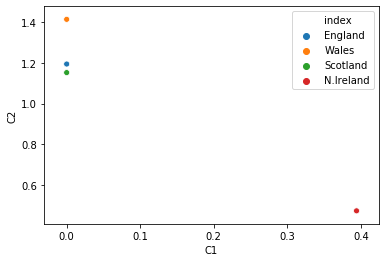

In [79]:
sns.scatterplot(x='C1',y='C2',data=encode_df,hue='index')